In [1]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Nacho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.set_context("poster", font_scale = .5)

In [17]:
df = pd.read_csv("rvvcca.csv",sep=";")

In [18]:
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [100]:
tiene_ruido = df.dropna(how="all",subset=["Ruido"])["Estacion"].unique()

In [45]:
df.groupby("Estacion")["Fecha","NO2"].rolling(7,on="Fecha").mean()
df.groupby("Estacion")["Fecha","Temperatura"].rolling('7d',on="Fecha").mean()

C:\Users\Nacho\AppData\Local\Temp/ipykernel_23876/3398743921.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Estacion")["Fecha","NO2"].rolling(7,on="Fecha").mean()


Fecha        NO2
Estacion                                 
Avda. Francia 1275  2009-01-01        NaN
              1278  2009-02-01        NaN
              1281  2009-03-01        NaN
              1287  2009-07-01        NaN
              1289  2009-08-01        NaN
...                        ...        ...
Viveros       43306 2022-12-13  20.714286
              43346 2022-12-22  22.142857
              43356 2022-12-24  21.285714
              43371 2022-12-28  22.571429
              43375 2022-12-29  20.428571

[43388 rows x 2 columns]

C:\Users\Nacho\AppData\Local\Temp/ipykernel_23876/2793436542.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.lineplot(data=df.groupby("Estacion")["Fecha","Temperatura"].rolling(window=30,center=True,win_type="gaussian",on="Fecha").mean().reset_index(0),x="Fecha",y="Temperatura",hue="Estacion")


<AxesSubplot:xlabel='Fecha', ylabel='Temperatura'>

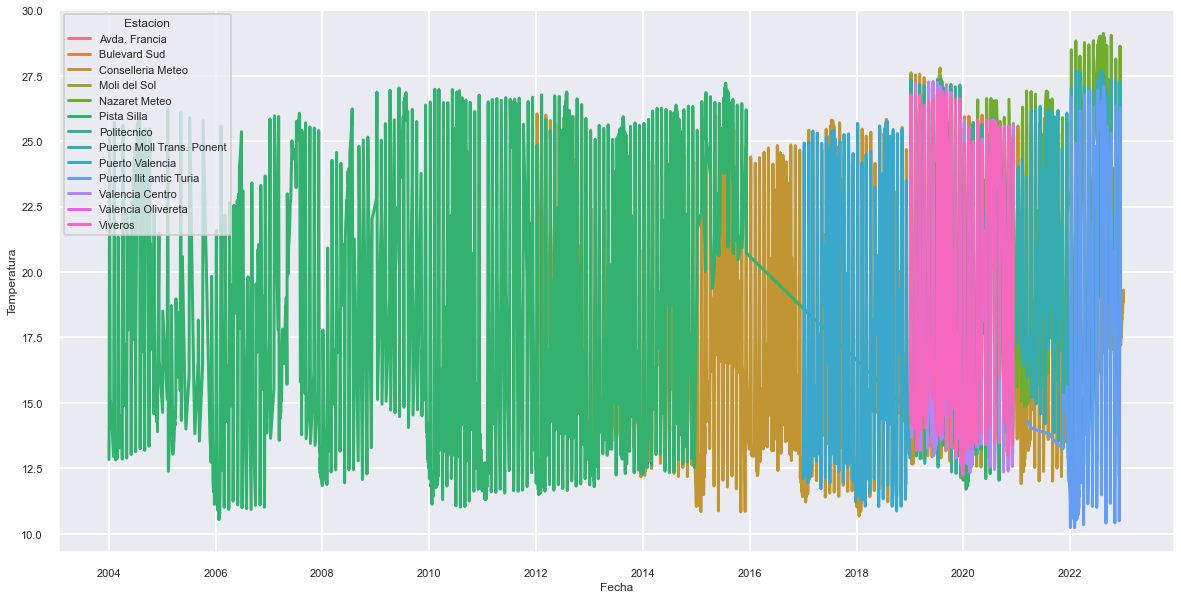

In [78]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df.groupby("Estacion")["Fecha","Temperatura"].rolling(window=30,center=True,win_type="gaussian",on="Fecha").mean().reset_index(0),x="Fecha",y="Temperatura",hue="Estacion")


<AxesSubplot:xlabel='Fecha', ylabel='Ruido'>

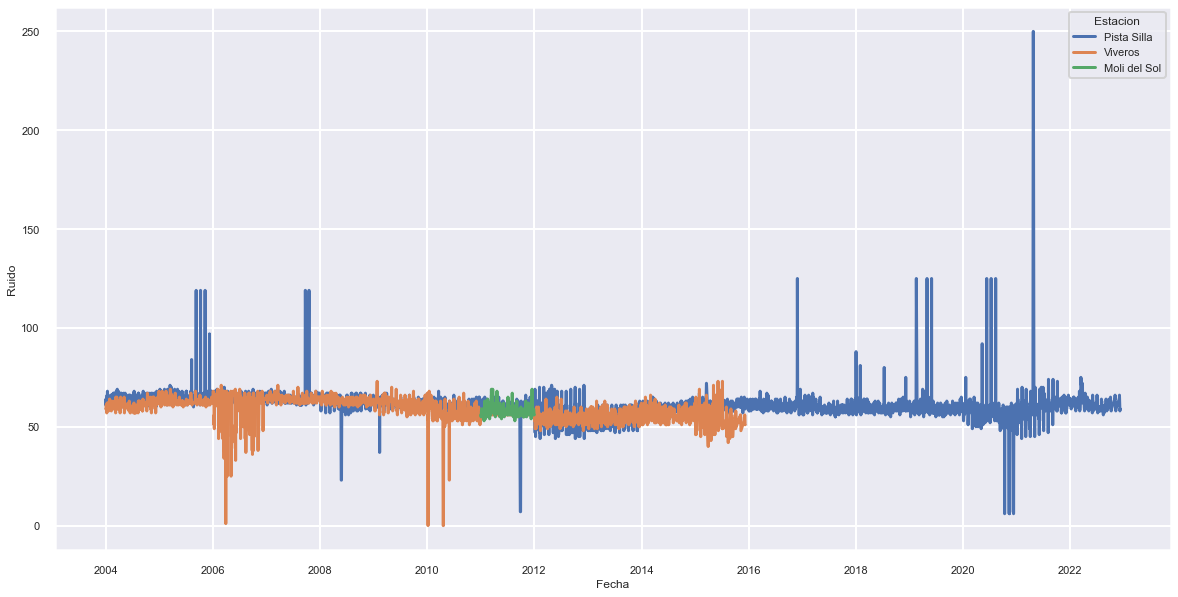

In [101]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df[df["Estacion"].isin(tiene_ruido)],x="Fecha",y="Ruido",hue="Estacion")